In [1]:
from preprocess import load_model
import torch
import numpy as np

In [2]:
corpus_t, dictionary_t, tfidf_t, lsi_t, mSimilar_t = load_model("./preprocess/model/")
corpus, dictionary, tfidf, lsi, mSimilar = load_model("./preprocess/model_test/")

2021-04-10 17:51:25,626 : INFO : loaded corpus index from ./preprocess/model/corpus.mm.index
2021-04-10 17:51:25,626 : INFO : initializing cython corpus reader from ./preprocess/model/corpus.mm
2021-04-10 17:51:25,626 : INFO : accepted corpus with 9804 documents, 255478 features, 6928768 non-zero entries
2021-04-10 17:51:25,626 : INFO : loading Dictionary object from ./preprocess/model/model.dic
2021-04-10 17:51:25,783 : INFO : Dictionary lifecycle event {'fname': './preprocess/model/model.dic', 'datetime': '2021-04-10T17:51:25.783196', 'gensim': '4.0.1', 'python': '3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
2021-04-10 17:51:25,798 : INFO : loading TfidfModel object from ./preprocess/model/model.tfidf
2021-04-10 17:51:25,972 : INFO : TfidfModel lifecycle event {'fname': './preprocess/model/model.tfidf', 'datetime': '2021-04-10T17:51:25.972148', 'gensim': '4.0.1', 'python': '3.9.2 (tags/v3.

In [3]:
from training_utils import get_list

X = lsi[tfidf[corpus]]
X = get_list(X)
X = torch.from_numpy(np.array(X))

In [6]:
from training_utils import get_list
import numpy as np

X_t = lsi_t[tfidf_t[corpus_t]]
X_t = get_list(X_t)
X_t = torch.from_numpy(np.array(X_t))

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [5]:
from file_utils import get_files

f_list = get_files("./corpus/test/")
l = np.array([int(i.split("\\")[-1].split("-")[0][1:]) for i in f_list])
f_list = get_files("./corpus/train/")
l_t = np.array([int(i.split("\\")[-1].split("-")[0][1:]) for i in f_list])

KMeans结果

In [33]:
from training_utils import best_map
from kmeans.numpy_kmeans import KMeans

max_acc = 0
max_i = -1

#14
for i in range(1000):
    kmeans = KMeans(20, random_state=i, device=device)
    label, _ = kmeans.fit_predict(X)
    acc, _ = best_map(l, label.numpy())
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.41:
        print(i, acc)
print("max", max_i, max_acc)

21 0.4278885272579333
58 0.4145646867371847
67 0.41120829943043125
126 0.41120829943043125
278 0.41822620016273393
447 0.41670056956875506
501 0.4131407648494711
561 0.41171684296175753
598 0.4254475183075671
615 0.42036208299430433
659 0.4178193653376729
669 0.4424328722538649
705 0.4105980471928397
706 0.4227013832384052
718 0.41405614320585843
733 0.411920260374288
738 0.4246338486574451
740 0.42026037428803903
811 0.41303905614320585
837 0.41334418226200165
881 0.4152766476810415
975 0.4118185516680228
max 669 0.4424328722538649


In [7]:
# kmeans
from kmeans.numpy_kmeans import KMeans
from training_utils import best_map
from training_utils import scores

kmeans = KMeans(20, random_state=669, device=device)
label, _ = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label.numpy())
print("准确率:", acc)
scores(l, label_pred, X)

准确率: 0.4424328722538649
互信息：1.1900256746314104
调整互信息：0.4885360559527755
标准化互信息：0.4925206933221827
兰德系数： 0.29144547739765814
轮廓系数： 0.21084244549743664


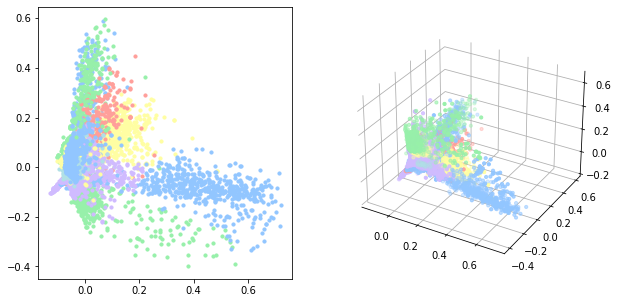

In [8]:
from training_utils import draw

draw(X, label)

KMeans++结果

In [29]:
# kmeans++
from sklearn.cluster import KMeans
from training_utils import best_map

max_acc = 0
max_i = -1

for i in range(1000):
    kmeans = KMeans(20, random_state=i)
    label = kmeans.fit_predict(X)
    acc, _ = best_map(l, label)
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.41:
        print(i, acc)
print("max", max_i, max_acc)

272 0.4103946297803092
359 0.4197518307567128
418 0.4103946297803092
446 0.4131407648494711
452 0.41385272579332794
495 0.411920260374288
522 0.4219894222945484
639 0.411920260374288
740 0.41120829943043125
759 0.41232709519934907
799 0.41171684296175753
846 0.4127339300244101
926 0.4108014646053702
948 0.4212774613506916
max 522 0.4219894222945484


In [10]:
from sklearn.cluster import KMeans
from training_utils import best_map
from training_utils import scores

kmeans = KMeans(20, random_state=522)
label = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label)
print("准确率:", acc)
scores(l, label_pred, X)

准确率: 0.4219894222945484
互信息：1.1705629797881998
调整互信息：0.4766189965085966
标准化互信息：0.48071098626598285
兰德系数： 0.2775415142707145
轮廓系数： 0.23701950921301126


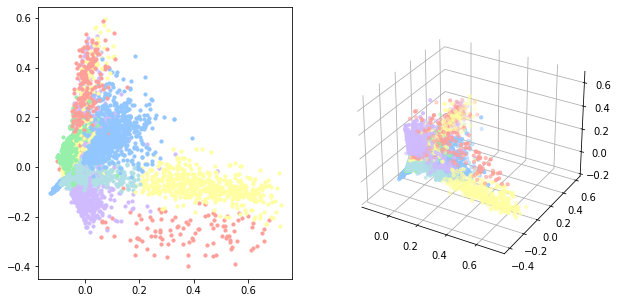

In [11]:
from training_utils import draw

draw(X, label)

MiniBatchKmeans结果

In [26]:
# minibatchKmeans
from sklearn.cluster import MiniBatchKMeans
from training_utils import best_map

max_acc = 0
max_i = -1
for i in range(2000):
    kmeans = MiniBatchKMeans(20, random_state=i, batch_size=100)
    label = kmeans.fit_predict(X)
    acc, _ = best_map(l, label)
    if acc > max_acc:
        max_acc = acc
        max_i = i
    if acc > 0.44:
        print(i, acc)
print("max", max_i, max_acc)

174 0.447213181448332
285 0.4652156224572823
447 0.4529088689991863
849 0.4463995117982099
1340 0.45117982099267695
1456 0.4537225386493084
max 285 0.4652156224572823


In [12]:
from sklearn.cluster import MiniBatchKMeans
from training_utils import best_map
from training_utils import scores

kmeans = MiniBatchKMeans(20, random_state=285, batch_size=100)
label = kmeans.fit_predict(X)
acc, label_pred = best_map(l, label)
print("准确率:", acc)
scores(l, label_pred, X)

准确率: 0.4652156224572823
互信息：1.1729205312185986
调整互信息：0.4844276142098596
标准化互信息：0.4885022278453082
兰德系数： 0.32995635619655606
轮廓系数： 0.22000975666309422


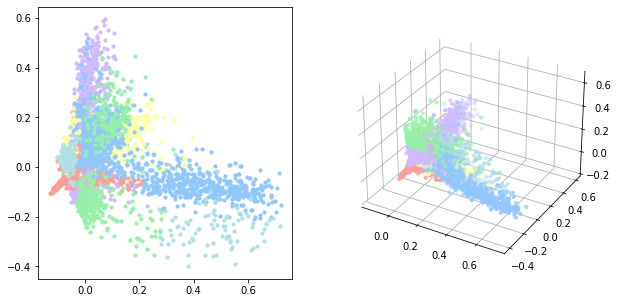

In [13]:
from training_utils import draw

draw(X, label)